# Teste de BI
Candidato: Jayme Anchante

## Questões R Básico:

In [1]:
# Links para as bases de dados do R:

mtcars_link = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv'
quakes_link = 'https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/quakes.csv'
cars_link = 'https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/cars.csv'

### 1. Usando mtcars, trazer a média de miles per galon da marca Mercedez. Atribuir isso a uma variável x.

In [2]:
import pandas as pd

mtcars = pd.read_csv(mtcars_link)
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars.rename(columns = {'Unnamed: 0': 'name'}, inplace = True)
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
x = mtcars.mpg[mtcars.name.str[:4] == 'Merc'].mean()
x

19.014285714285712

### 2. Testar se há correlação entre o peso do carro e o consumo de gasolina. Existe? Por quê?

In [5]:
mtcars[['mpg', 'wt']].corr()

,mpg,wt
mpg,1.000000,-0.867659
wt,-0.867659,1.000000


/home/jayme/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


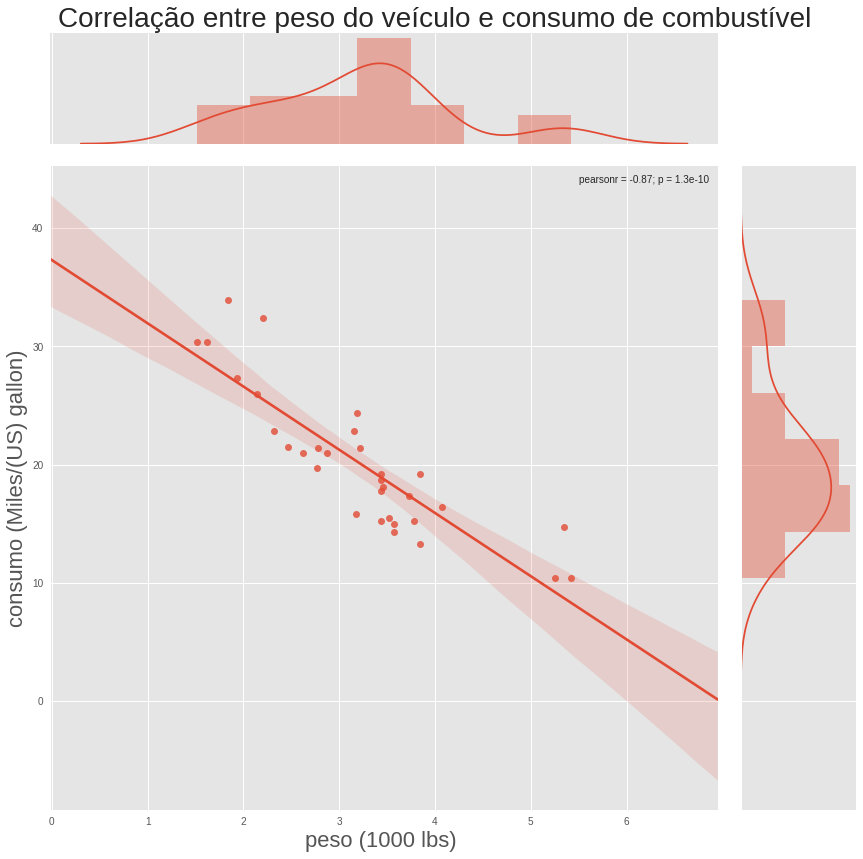

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')

mpg_wt = mtcars[['mpg', 'wt']]

joint = sns.jointplot('wt', 'mpg', data = mpg_wt, kind = 'reg', size = 12)
plt.subplots_adjust(top=0.95)
joint.fig.suptitle('Correlação entre peso do veículo e consumo de combustível', fontsize = 28)
plt.xlabel('peso (1000 lbs) ', fontsize = 22)
plt.ylabel('consumo (Miles/(US) gallon)', fontsize = 22);

<font size="4"> Há "forte" correlação linear negativa ou inversa entre peso e quilometragem dos veículos: quanto maior o peso, menor a quilometragem. Provavelmente, o motor "exige" mais combustível de veículos mais pesados do que dos mais leves para locomover-se. </font>

### 3. Usando quakes, qual é a maior magnitude de um terremoto? e qual a magnitude média? e o desvio entre as magnitudes?

In [7]:
quakes = pd.read_csv(quakes_link)
quakes.head()

,Unnamed: 0,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


In [8]:
quakes.rename(columns = {'Unnamed: 0': 'id'}, inplace = True)

print('A maior magnitude de um terremoto é', quakes['mag'].max(), 'na escala Richter!')

A maior magnitude de um terremoto é 6.4 na escala Richter!


In [9]:
print('A magnitude média é de', round(quakes['mag'].mean(), 4), 'na escala Richter')

A magnitude média é de 4.6204 na escala Richter


In [10]:
print('O desvio das magnitudes é de', round(quakes['mag'].std(), 4))

O desvio das magnitudes é de 0.4028


### 4. Usando cars, qual é a distância de frenagem se o carro estiver a 90 milhas por hora.

In [11]:
cars = pd.read_csv(cars_link)
cars.tail()

,Unnamed: 0,speed,dist
45,46,24,70
46,47,24,92
47,48,24,93
48,49,24,120
49,50,25,85


In [12]:
del cars['Unnamed: 0']

cars['speed'].max()

25

/home/jayme/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


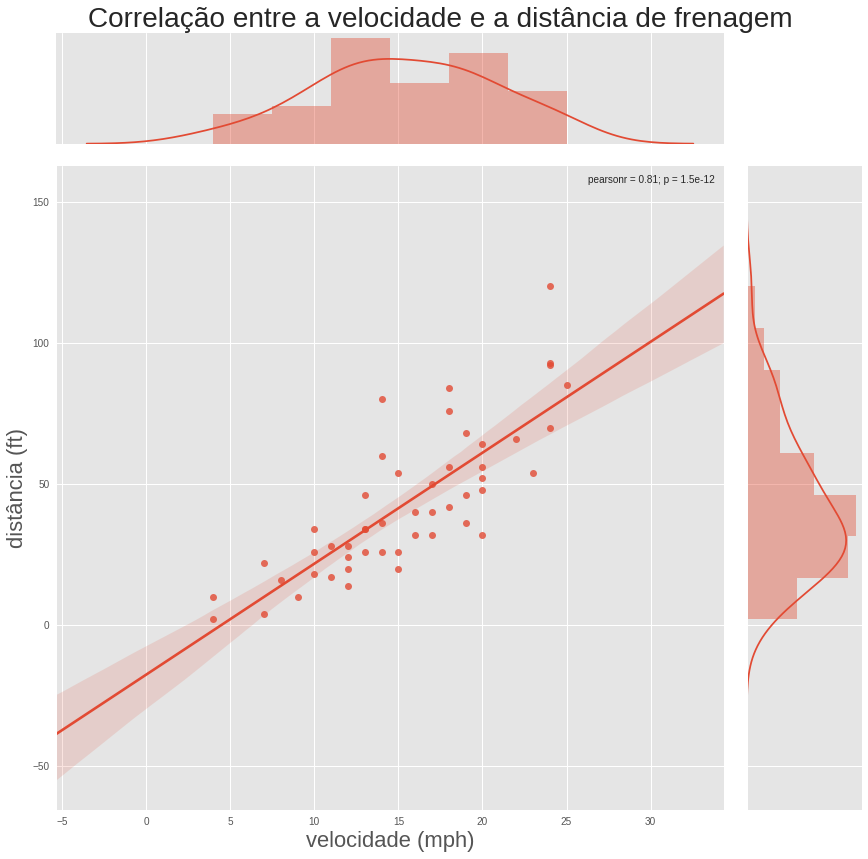

In [13]:
joint = sns.jointplot('speed', 'dist', data = cars, kind = 'reg', size = 12)
plt.subplots_adjust(top=0.95)
joint.fig.suptitle('Correlação entre a velocidade e a distância de frenagem', fontsize = 28)
plt.xlabel('velocidade (mph)', fontsize = 22)
plt.ylabel('distância (ft)', fontsize = 22);

In [14]:
speed = cars['speed'].reshape(50, 1)
dist = cars['dist'].reshape(50, 1)

/home/jayme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/jayme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [15]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X = speed, y = dist)
reg.coef_

array([[ 3.93240876]])

In [16]:
print('A distância de frenagem é de', reg.predict(90), 'ft caso o carro esteja a 90 mph')

A distância de frenagem é de [[ 336.33769343]] ft caso o carro esteja a 90 mph


## Questões SQL Básico:

### 1. Dadas as tabelas abaixo:

In [17]:
import sqlite3

conn = sqlite3.connect('example.db')

In [18]:
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE users
             (id int, name text)''')

c.execute('''CREATE TABLE tasks
            (id int, event text, id_resp int)''')

# Insert a row of data
c.execute('''INSERT INTO users VALUES
            (1, 'Igor Sanchez'),
            (2, 'Joao Junior'),
            (3, 'Rodrigo Pinto'),
            (4, 'Amandio Pereira'),
            (5, 'Karoline Leal')''')

# Insert a row of data
c.execute('''INSERT INTO tasks VALUES
            (1, 'send report', 3),
            (2, 'drink coffee', 2),
            (3, 'travel CWB', 3),
            (4, 'call mkt', 6)''')

# Save (commit) the changes
conn.commit()

In [19]:
for row in c.execute("SELECT * from users"):
    print(row)

(1, 'Igor Sanchez')
(2, 'Joao Junior')
(3, 'Rodrigo Pinto')
(4, 'Amandio Pereira')
(5, 'Karoline Leal')


In [20]:
for row in c.execute("SELECT * from tasks"):
    print(row)

(1, 'send report', 3)
(2, 'drink coffee', 2)
(3, 'travel CWB', 3)
(4, 'call mkt', 6)


Qual o resultado da query abaixo?  
SELECT * FROM users LEFT JOIN tasks ON users.id = tasks.id_resp;

In [21]:
for row in c.execute('''SELECT * FROM users
                    LEFT JOIN tasks
                    ON users.id = tasks.id_resp'''):
    print(row)

(1, 'Igor Sanchez', None, None, None)
(2, 'Joao Junior', 2, 'drink coffee', 2)
(3, 'Rodrigo Pinto', 1, 'send report', 3)
(3, 'Rodrigo Pinto', 3, 'travel CWB', 3)
(4, 'Amandio Pereira', None, None, None)
(5, 'Karoline Leal', None, None, None)


<font size="4"> A query retorna todos os valores da tabela da esquerda (users), os registros pareados na tabela da direita (tasks). O resultado é NULL (NA em R, None em Python) na tabela da direita nas linhas não pareadas.</font>

### 2. Especifique cada tipo de JOIN:
  
  
<font size="4">• **Left Join**: A query retorna todos os valores da tabela da esquerda, os registros pareados na tabela da direita. O resultado é NULL (NA em R, None em Python) na tabela da direita nas linhas não pareadas.  
  
• **Right Join**: A query retorna todos os valores da tabela da direita, os registros pareados na tabela da esquerda. O resultado é NULL (NA em R, None em Python) na tabela da esquerda nas linhas não pareadas.  
  
• **Inner Join**: A query retorna apenas registros em que houve pareamento de valores em ambas as tabelas.  
  
• **Full Join**: A query retorna todos os registros em que houve pareamento ou na tabela da esquerda ou na tabela da direita. Ou seja, retorna todos os valores de ambas as tabelas
</font>

### 3. O que é uma chave primária de uma tabela?

<font size="4"> A chave primária identifica de forma exclusiva cada registro de uma tabela.  
A chave primária deve conter apenas valores únicos, e não pode conter valores NULL (NA em R, None em Python).  
Uma tabela pode conter apenas uma chave primária, que pode consistir de uma ou múltiplos campos (colunas).</font>

### 4. Quais dessas funções são destinadas a agregação de dados, GROUP BY?
LEN(), RIGHT(), SUM(), REPLACE(), COUNT(), CONCAT(), ABS()

<font size="4"> As funções de agregação de dados utilizadas com GROUP BY nessa amostra são SUM() e COUNT().</font>

### 5. Dado a tabela:

In [22]:
# Create table
c.execute('''CREATE TABLE firmas
            (id int, periodo int, estado text, origem text, qtd_users int)''')

# Insert a row of data
c.execute('''INSERT INTO firmas VALUES
            (3, 201705, 'PR', 'MGservico', 80),
            (1, 201705, 'PR', 'MGservico', 100),
            (2, 201705, 'PR', 'MGservico', 110),
            (4, 201705, 'RS', 'MGcomercio', 50),
            (5, 201706, 'RS', 'MGcomercio', 200),
            (6, 201706, 'SP', 'Abertura', 250),
            (7, 201706, 'SP', 'Abertura', 400),
            (8, 201706, 'SP', 'Abertura', 310)''')

# Save (commit) the changes
conn.commit()

In [23]:
for row in c.execute("SELECT * from firmas"):
    print(row)

(3, 201705, 'PR', 'MGservico', 80)
(1, 201705, 'PR', 'MGservico', 100)
(2, 201705, 'PR', 'MGservico', 110)
(4, 201705, 'RS', 'MGcomercio', 50)
(5, 201706, 'RS', 'MGcomercio', 200)
(6, 201706, 'SP', 'Abertura', 250)
(7, 201706, 'SP', 'Abertura', 400)
(8, 201706, 'SP', 'Abertura', 310)


a. Escreva a clausula WHERE que retorne as quantidades do período 201705 para o estado do PR quando as quantidades forem superiores a 80.

In [24]:
for row in c.execute('''SELECT * FROM firmas
            WHERE periodo = 201705 AND estado = "PR" AND qtd_users > 80 '''):
    print(row)

(1, 201705, 'PR', 'MGservico', 100)
(2, 201705, 'PR', 'MGservico', 110)


b. Quais id linhas serão retornadas?

As linhas id cujo valor são 1 e 2.

### 6. Dadas as tabelas abaixo:

In [25]:
c = conn.cursor()

c.execute("DROP TABLE users")
c.execute("DROP TABLE tasks")

# Create table
c.execute('''CREATE TABLE users
             (id int, name text, status text)''')

c.execute('''CREATE TABLE tasks
            (id int, event text, id_resp int, status text)''')

# Insert a row of data
c.execute('''INSERT INTO users VALUES
            (1, 'Igor Sanchez', 'ativo'),
            (2, 'Joao Junior', 'ativo'),
            (3, 'Rodrigo Pinto', 'inativo'),
            (4, 'Amandio Pereira', 'inativo'),
            (5, 'Karoline Leal', 'ativo')''')

# Insert a row of data
c.execute('''INSERT INTO tasks VALUES
            (1, 'send report', 3, 'null'),
            (2, 'drink coffee', 2, 'undone'),
            (3, 'travel CWB', 3, 'null'),
            (4, 'call mkt', 6, 'done'),
            (5, 'feed the badger', 2, 'undone'),
            (4, 'buy a badger', 6, 'done')''')

# Save (commit) the changes
conn.commit()

In [26]:
for row in c.execute("SELECT * from users"):
    print(row)

(1, 'Igor Sanchez', 'ativo')
(2, 'Joao Junior', 'ativo')
(3, 'Rodrigo Pinto', 'inativo')
(4, 'Amandio Pereira', 'inativo')
(5, 'Karoline Leal', 'ativo')


In [27]:
for row in c.execute("SELECT * FROM tasks"):
    print(row)

(1, 'send report', 3, 'null')
(2, 'drink coffee', 2, 'undone')
(3, 'travel CWB', 3, 'null')
(4, 'call mkt', 6, 'done')
(5, 'feed the badger', 2, 'undone')
(4, 'buy a badger', 6, 'done')


a. Faça uma query contendo o resultado das duas tabelas juntas, renomenando o campo status da tabela users para funcionario_ativo.

A query seria:

In [28]:
for row in c.execute('''SELECT *, users.status AS funcionario_ativo FROM users
                        FULL OUTER JOIN tasks ON users.id = tasks.id_resp'''):
    print(row)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 73))



OperationalError: RIGHT and FULL OUTER JOINs are not currently supported

Entretanto, SQLite não suporta RIGHT e FULL OUTER JOIN. Portanto, eu tive que "emular" o comando FULL OUTER JOIN usando as cláusulas UNION e LEFT JOIN.  
  
Fonte: http://www.sqlitetutorial.net/sqlite-full-outer-join/

In [29]:
for row in c.execute('''SELECT u.id, u.name, u.status AS funcionário_ativo, t.id, t.event, t.id_resp, t.status
                        FROM users u
                        LEFT JOIN tasks t ON u.id = t.id_resp
                        UNION ALL
                        SELECT u.id, u.name, u.status, t.id, t.event, t.id_resp, t.status
                        FROM tasks t
                        LEFT JOIN users u ON u.id = t.id_resp
                        WHERE u.status IS NULL'''):
    print(row)

(1, 'Igor Sanchez', 'ativo', None, None, None, None)
(2, 'Joao Junior', 'ativo', 2, 'drink coffee', 2, 'undone')
(2, 'Joao Junior', 'ativo', 5, 'feed the badger', 2, 'undone')
(3, 'Rodrigo Pinto', 'inativo', 1, 'send report', 3, 'null')
(3, 'Rodrigo Pinto', 'inativo', 3, 'travel CWB', 3, 'null')
(4, 'Amandio Pereira', 'inativo', None, None, None, None)
(5, 'Karoline Leal', 'ativo', None, None, None, None)
(None, None, None, 4, 'call mkt', 6, 'done')
(None, None, None, 4, 'buy a badger', 6, 'done')


b. Faça outra query que traga os eventos com o nome do responsável. O resultado não deve trazer os campos de status de ambas tabelas, porém deve trazer um novo campo de status_do_evento que deve construindo da seguinte forma:  
  
• se o status do funcionário for ativo e o status do evento for done, marcar como sucesso  
• se o status do funcionário for ativo e o status do evento for undone, marcar como falha  
• se o status do funcionário for inativo e o status do evento for nulo, marcar como reatribuir

In [30]:
for row in c.execute('''SELECT users.name, tasks.event, CASE
                        WHEN users.status = "ativo" AND tasks.status = "done" THEN "sucesso"
                        WHEN users.status = "ativo" AND tasks.status = "undone" THEN "falha"
                        WHEN users.status = "inativo" AND tasks.status = "null" then "reatribuir"
                        END AS status_do_evento FROM tasks
                        LEFT JOIN users
                        ON users.id = tasks.id_resp'''):
    print(row)

('Rodrigo Pinto', 'send report', 'reatribuir')
('Joao Junior', 'drink coffee', 'falha')
('Rodrigo Pinto', 'travel CWB', 'reatribuir')
(None, 'call mkt', None)
('Joao Junior', 'feed the badger', 'falha')
(None, 'buy a badger', None)


In [31]:
# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()